In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
from matplotlib.colors import LogNorm
import subprocess

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

from scipy import integrate

In [4]:
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl/exp/"

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

In [5]:
epgExpInb = copy(exp_1g_corr)
epgExpInbCDFT = epgExpInb.loc[exp_1g_corr.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [6]:
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl_outb/exp/"

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")

In [7]:
epgExpOutb = copy(exp_1g_corr)
epgExpOutbCDFT = epgExpOutb.loc[exp_1g_corr.config == 3]
epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]

In [8]:
epgExp = pd.concat([epgExpInb, epgExpOutb])

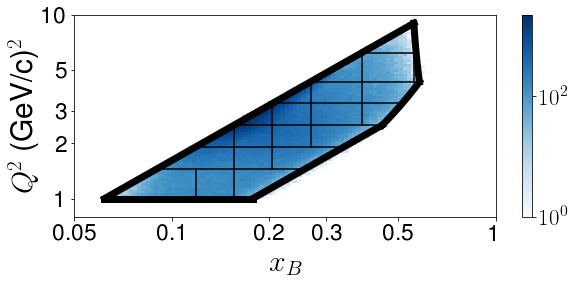

In [9]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

cmap = copy(plt.cm.get_cmap("Blues"))


# plt.hist2d(epgExpInb.loc[epgExpInb.tmin2>0.3].xB, epgExpInb.loc[epgExpInb.tmin2>0.3].Q2, bins = [np.linspace(0.05, 0.6, 101), np.linspace(1, 10, 101)], cmin = 1)
# plt.hist2d(np.log10(epgExpInbFD.xB), np.log10(epgExpInbFD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCD.xB), np.log10(epgExpInbCD.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 1, 101)], cmin = 1, cmap = cmap)
# plt.hist2d(np.log10(epgExpInbCDFT.xB), np.log10(epgExpInbCDFT.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.95, 101)], cmin = 1, cmap = cmap)
h = plt.hist2d(np.log10(epgExp.xB), np.log10(epgExp.Q2), bins = [np.linspace(np.log10(0.05), 0, 101), np.linspace(-0.1, 1, 101)], cmin = 1, cmap = cmap, norm=LogNorm())
plt.colorbar(h[3])
# plt.hist2d(np.log10(epgExpInb61.xB), np.log10(epgExpInb61.Q2), bins = [np.linspace(-1.1, -0.21, 101), np.linspace(0.1, 0.99, 101)], cmin = 1, cmap = cmap)

k= 2*M*(np.sqrt(0.8**2+M**2)-M)
# plt.axvline(0.5)
# plt.axvline(0.4)
# plt.axvline(0.3)
# plt.axvline(0.2)
# plt.axvline(0.1)
x1 = 1/2/M/8.604
# plt.axvline(np.log10(x1))
x2 = 1/2/M/3
# plt.axvline(np.log10(x2))
x3 = 1-(4-M**2)/2/M/3
# plt.axvline(np.log10(x3))
x4 = 2*(1-np.sqrt((k-M**4+4*M**2)/k))/(M**4/k - 4*M**2/k)
# plt.axvline(np.log10(x4))
x5 = (-1+np.sqrt(1+4*M**2/k*(1+M/8.604/2)))/2/M**2*k
# plt.axvline(np.log10(x5))
y1 = 1
y2 = 1.456
y3 = 6*M*x3
y4 = (4-M**2)*x4/(1-x4)
y5 = 2*M*8.604*x5

l1 = np.linspace(x1, x5, 101)
plt.plot(np.log10(l1), np.log10(l1*2*M*(10.604-2)), color = 'k', linewidth = 7)
l2 = np.linspace(x1, x2, 101)
plt.plot(np.log10(l2), np.log10(1+l2*0), color = 'k', linewidth = 7)
l3 = np.linspace(x2, x3, 101)
plt.plot(np.log10(l3), np.log10(l3*2*M*(3)), color = 'k', linewidth = 7)
k= 2*M*(np.sqrt(0.8**2+M**2)-M)
l4 = np.linspace(x3, x4, 101)
plt.plot(np.log10(l4), np.log10((4 - M*M)*l4/(1 - l4)), color = 'k', linewidth = 7)
l5 = np.linspace(x5, x4, 101)
plt.plot(np.log10(l5), np.log10(M*M*l5/(M*M*l5*l5/k-(1-l5))), color = 'k', linewidth = 7)

# c11 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/8.6048
# c12 = np.sqrt(np.sqrt(y1*y3)*y1)/2/M/3

c0 = y2/2/M/8.604
d0 = y2/2/M/3
c1 = np.sqrt(y2*y3)/2/M/8.604
d1 = np.sqrt(y2*y3)/2/M/3
plt.plot(np.linspace(np.log10(c1),np.log10(c1), 101), np.linspace(np.log10(y1), np.log10(y2), 101), color='k')
c2 = y3/2/M/8.604
d2 = x3
plt.plot(np.linspace(np.log10(c2),np.log10(c2), 101), np.linspace(np.log10(y1), np.log10(y3), 101), color='k')
c3 = np.sqrt(y3*y4)/2/M/8.604
d3 = 1/(1+(4-M*M)/np.sqrt(y3*y4))
plt.plot(np.linspace(np.log10(c3),np.log10(c3), 101), np.linspace(np.log10(y2), np.log10(np.sqrt(y3*y4)), 101), color='k')
c4 = y4/2/M/8.604
d4 = x5
plt.plot(np.linspace(np.log10(c4),np.log10(c4), 101), np.linspace(np.log10(np.sqrt(y2*y3)), np.log10(y4), 101), color='k')
c5 = np.sqrt(y4*y5)/2/M/8.604
d5 = x5
plt.plot(np.linspace(np.log10(c5),np.log10(c5), 101), np.linspace(np.log10(y3), np.log10(np.sqrt(y4*y5)), 101), color='k')
plt.plot(np.linspace(np.log10(x5),np.log10(x5), 101), np.linspace(np.log10(y4), np.log10(y5), 101), color='k')

plt.plot(np.linspace(np.log10(c0), np.log10(d0), 101), np.linspace(np.log10(y2), np.log10(y2), 101), color='k')
plt.plot(np.linspace(np.log10(c1), np.log10(d1), 101), np.linspace(np.log10(np.sqrt(y2*y3)), np.log10(np.sqrt(y2*y3)), 101), color='k')
plt.plot(np.linspace(np.log10(c2), np.log10(d2), 101), np.linspace(np.log10(y3), np.log10(y3), 101), color='k')
plt.plot(np.linspace(np.log10(c3), np.log10(d3), 101), np.linspace(np.log10(np.sqrt(y3*y4)), np.log10(np.sqrt(y3*y4)), 101), color='k')
plt.plot(np.linspace(np.log10(c4), np.log10(d4), 101), np.linspace(np.log10(y4), np.log10(y4), 101), color='k')
plt.plot(np.linspace(np.log10(c5), np.log10(d5), 101), np.linspace(np.log10(np.sqrt(y4*y5)), np.log10(np.sqrt(y4*y5)), 101), color='k')

plt.ylim([-0.1, 1])
plt.xlim([-1.25, -0.2])
plt.yticks([0, np.log10(2), np.log10(3), np.log10(5), np.log10(10)], [1, 2, 3, 5, 10] )
plt.xticks([np.log10(0.05), -1, np.log10(0.2), np.log10(0.3), np.log10(0.5), 0], [0.05, 0.1, 0.2, 0.3, 0.5, 1])

plt.xlabel(r"$x_B$")
plt.ylabel(r"$Q^2$"+" "+ GeVc2)
plt.show()

In [10]:
epgExp0 = epgExp.loc[(epgExp.Q2>y1)&(epgExp.Q2<y2)]
epgExp01 = epgExp0.loc[(epgExp0.xB<c1)&(epgExp0.Q2<=2*M*(10.604-2)*epgExp0.xB)]
epgExp02 = epgExp0.loc[(epgExp0.xB>=c1)&(epgExp0.xB<c2)]
epgExp03 = epgExp0.loc[(epgExp0.xB>=c2)&(epgExp0.Q2>=2*M*3*epgExp0.xB)]

epgExp1 = epgExp.loc[(epgExp.Q2>y2)&(epgExp.Q2<np.sqrt(y2*y3))]
epgExp11 = epgExp1.loc[(epgExp1.xB<c2)&(epgExp1.Q2<=2*M*(10.604-2)*epgExp1.xB)]
epgExp12 = epgExp1.loc[(epgExp1.xB>=c2)&(epgExp1.xB<c3)]
epgExp13 = epgExp1.loc[(epgExp1.xB>=c3)&(epgExp1.Q2>=2*M*3*epgExp1.xB)]

epgExp2 = epgExp.loc[(epgExp.Q2>np.sqrt(y2*y3))&(epgExp.Q2<y3)]
epgExp21 = epgExp2.loc[(epgExp2.xB<c2)&(epgExp2.Q2<2*M*(10.604-2)*epgExp2.xB)]
epgExp22 = epgExp2.loc[(epgExp2.xB>=c2)&(epgExp2.xB<c3)]
epgExp23 = epgExp2.loc[(epgExp2.xB>=c3)&(epgExp2.xB<c4)]
epgExp24 = epgExp2.loc[(epgExp2.xB>=c4)&(epgExp2.Q2>=2*M*3*epgExp2.xB)]

epgExp3 = epgExp.loc[(epgExp.Q2>y3)&(epgExp.Q2<np.sqrt(y3*y4))]
epgExp31 = epgExp3.loc[(epgExp3.xB<c3)&(epgExp3.Q2<2*M*(10.604-2)*epgExp3.xB)]
epgExp32 = epgExp3.loc[(epgExp3.xB>=c3)&(epgExp3.xB<c4)]
epgExp33 = epgExp3.loc[(epgExp3.xB>=c4)&(epgExp3.xB<c5)]
epgExp34 = epgExp3.loc[(epgExp3.xB>=c5)&(epgExp3.Q2>=(4 - M*M)*epgExp3.xB/(1 - epgExp3.xB))]

epgExp4 = epgExp.loc[(epgExp.Q2>np.sqrt(y3*y4))&(epgExp.Q2<y4)]
epgExp41 = epgExp4.loc[(epgExp4.xB<c4)&(epgExp4.Q2<2*M*(10.604-2)*epgExp4.xB)]
epgExp42 = epgExp4.loc[(epgExp4.xB>=c4)&(epgExp4.xB<c5)]
epgExp43 = epgExp4.loc[(epgExp4.xB>=c5)&(epgExp4.Q2>=(4 - M*M)*epgExp4.xB/(1 - epgExp4.xB))]

epgExp5 = epgExp.loc[(epgExp.Q2>y4)&(epgExp.Q2<np.sqrt(y4*y5))]
epgExp51 = epgExp5.loc[(epgExp5.xB<c5)&(epgExp5.Q2<2*M*(10.604-2)*epgExp5.xB)]
epgExp52 = epgExp5.loc[(epgExp5.xB>=c5)&(epgExp5.xB<x5)]

epgExp6 = epgExp.loc[(epgExp.Q2>np.sqrt(y4*y5))&(epgExp.Q2<y5)]
epgExp61 = epgExp6.loc[(epgExp6.xB<x5)&(epgExp6.Q2<2*M*(10.604-2)*epgExp6.xB)]

In [11]:
epgExp = pd.concat([epgExp01, epgExp02, epgExp03, epgExp11, epgExp12, epgExp13, epgExp21, epgExp22, epgExp23, epgExp24, epgExp31, epgExp32, epgExp33, epgExp34, epgExp41, epgExp42, epgExp43, epgExp51, epgExp52, epgExp61])

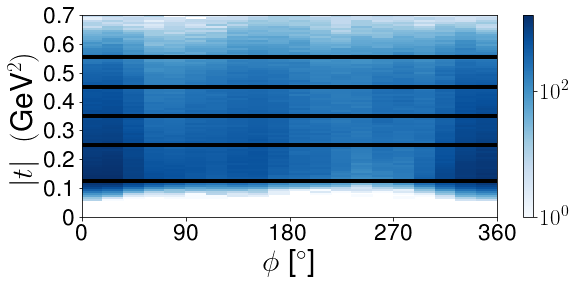

In [12]:
h = plt.hist2d(epgExp.phi2, (epgExp.t2), bins = [np.linspace(0, 360, 21), np.linspace(0.0, 0.7, 101)], cmin = 1, cmap = cmap, norm = LogNorm())
plt.colorbar(h[3])
plt.ylabel(r"$|t|~~ ($"+GeV2+r"$)$")
plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.axhline(0.126, color = 'k', linewidth = 4)
plt.axhline(0.25, color = 'k', linewidth = 4)
plt.axhline(0.35, color = 'k', linewidth = 4)
plt.axhline(0.45, color = 'k', linewidth = 4)
plt.axhline(0.553, color = 'k', linewidth = 4)
plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.show()

In [13]:
parent_MC = "/Volumes/Extreme SSD/Jan2022/convPkl/dvcs/"
parent_bhMC = "/Volumes/Extreme SSD/Jan2022/convPkl/bh/"
parent_Gen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/dvcs/inb/"
parent_bhGen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/bh/inb/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/Jan2022/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Jan2022/convPkl/exp/"

#dvcs Rec
df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
df_4124_corr = pd.read_pickle(parent_MC + "4124.pkl")
df_4139_corr = pd.read_pickle(parent_MC + "4139.pkl")
df_4181_corr = pd.read_pickle(parent_MC + "4181.pkl")
df_4182_corr = pd.read_pickle(parent_MC + "4182.pkl")

#bkg1g Rec
df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
df_4202_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4202.pkl")
df_4209_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4209.pkl")
#bkg2g Rec
df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")
df_4202_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4202.pkl")
df_4209_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4209.pkl")
#bkg2g Exp
exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [14]:
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])

In [15]:
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

In [16]:
parent_Gen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/dvcs/inb/"

# #dvcsGen
df_3987_Gen = pd.read_pickle(parent_Gen + "3987.pkl")
df_4124_Gen = pd.read_pickle(parent_Gen + "4124.pkl")
df_4139_Gen = pd.read_pickle(parent_Gen + "4139.pkl")
df_4181_Gen = pd.read_pickle(parent_Gen + "4181.pkl")
df_4182_Gen = pd.read_pickle(parent_Gen + "4182.pkl")

In [17]:
parent_bhMC = "/Volumes/Extreme SSD/Jan2022/convPkl/bh/"
parent_bhGen = "/Volumes/Extreme SSD/nov2021/convPkl_Gen/bh/inb/"

# #bhGen
df_4238_Gen = pd.read_pickle(parent_bhGen + "4238.pkl")
#bh Rec
df_4238_corr = pd.read_pickle(parent_bhMC + "4238.pkl")

bhSimInb = df_4238_corr
bhGenInb = df_4238_Gen

In [18]:
bhSimInbCDFT = bhSimInb.loc[bhSimInb.config == 3]
bhSimInbCD = bhSimInb.loc[bhSimInb.config == 2]
bhSimInbFD = bhSimInb.loc[bhSimInb.config == 1]

In [19]:
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
contFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
cont = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)

In [ ]:
# plt.rcParams["axes.titlesize"] = 35
# plt.rcParams["axes.labelsize"] = 40
# plt.rcParams["xtick.labelsize"] = 30
# plt.rcParams["ytick.labelsize"] = 30


# varstoplot = ["xB", "Q2", "t2", None, "reconGam", "ME_epg", "MM2_ep", "MM2_epg"]
# title = ["Bjorken x", "4-Momentum transfer", "Mandelstam t", "", "Cone Angle, "+r"$\gamma_{det.}$"+" and "+r"$\gamma_{rec.}$", "Missing Energy"+r"${}^{2},ep\gamma$", "Missing mass"+r"${}^{2},ep$", "Missing mass"+r"${}^{2},ep\gamma$"]
# label = [r"$x_{B}$", r"$Q^2$", r"$|t|$", "", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "ME"+r"${}_{ep\gamma}$", "MM"+r"${}^{2}_{ep}$", "MM"+r"${}^{2}_{ep\gamma}$"]
# unit = [None, GeVc2, GeV2, None, degree, GeV, GeV2, GeV2]
# # binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
# # binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
# fig, axs = plt.subplots(2, 4, figsize = (24,12))
# for yind in range(0, 2):
#     for xind in range(0,4):
#         ind = 4*yind + xind
#         if ind==3:
#             axs[yind,xind].axis("off")
#             continue
#         start = binstarts[ind]
#         end = binends[ind]
#         bins = 100#np.linspace(start, end, 101)
#         simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
# #         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
#         simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
#         expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
#         bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         if ind == 0:
#             axs[yind, xind].step(bincenters, expDist, where='mid', color='k', linewidth=1, label = 'Measured')
#             axs[yind, xind].step(bincenters, simDist, where='mid', color='b', linewidth=1, label = 'Monte Carlo')
#         else:
#             axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#             axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
# #         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
# #         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
# #         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].set_title(title[ind])
# #         axs[yind, xind].set_xlim([start, end])
#         if (unit[ind]):
#             axs[yind, xind].set_xlabel(label[ind]+" [" + unit[ind] +"]")
#         else:
#             axs[yind, xind].set_xlabel(label[ind])

# axs[0,0].set_xlim([0.08, 0.5])
# axs[0,0].set_xticks([0.1, 0.3,  0.5])
# axs[0,1].set_xlim([1, 5])
# axs[0,1].set_xticks([1, 3, 5])
# axs[0,2].set_xlim([0.1, 0.7])
# axs[0,2].set_xticks([0.1, 0.3, 0.5, 0.7])
            

# axs[1,0].set_xticks([0, 0.4, 0.8])
# axs[1,0].set_xlim([0, 0.8])
# axs[1,1].set_xlim([-1, 1])
# axs[1,3].set_xlim([-0.025, 0.025])
# axs[1,3].set_xticks([-0.02, 0, 0.02])
# axs[1,2].set_xticks([-0.4, 0, 0.4])
# # axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# # axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# # axs[1,2].set_xticks([0, 90, 180, 270, 360])
# plt.tight_layout()
# fig.legend(bbox_to_anchor=[0.98, 0.845], prop={'size': 35}, title_fontsize = 30, title = "Topology: "+r"$p$"+" CD, "+r"$\gamma$"+" FD\n"+"Torus polarity: -100\%", fancybox = True)
# # plt.savefig("kineCD.pdf")
# # plt.savefig("analysisnote/inbending1.pdf")
# plt.show()
# plt.clf()

In [ ]:
# varstoplot = ["xB", "Q2", "t2", "phi2"]
# title = ["Bjorken x", "4 Momentum Transfer", "Mandelstam t", None]
# label = [r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", "ME"+r"${}_{ep\gamma}$", "MM"+r"${}^{2}_{ep}$", "MM"+r"${}^{2}_{ep\gamma}$"]
# unit = [degree, GeV, GeV2, GeV2]
# binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
# binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
# fig, axs = plt.subplots(2, 2, figsize = (9,12))
# for yind in range(0, 2):
#     for xind in range(0,2):
#         ind = 2*yind + xind
#         start = binstarts[ind]
#         end = binends[ind]
#         bins = 100#np.linspace(start, end, 101)
#         simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
# #         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
#         simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
#         expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
#         bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         if ind == 0:
#             axs[yind, xind].step(bincenters, expDist, where='mid', color='k', linewidth=1, label = 'Measured')
#             axs[yind, xind].step(bincenters, simDist, where='mid', color='b', linewidth=1, label = 'Monte Carlo')
#         else:
#             axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#             axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
# #         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
# #         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
# #         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].set_title(title[ind])
# #         axs[yind, xind].set_xlim([start, end])
#         if (unit[ind]):
#             axs[yind, xind].set_xlabel(label[ind]+" [" + unit[ind] +"]")
#         else:
#             axs[yind, xind].set_xlabel(label[ind])
# # axs[0,0].set_xticks([0, 0.4, 0.8])
# # axs[0,0].set_xlim([0, 0.8])
# # axs[0,1].set_xlim([-1, 1])
# # axs[1,1].set_xlim([-0.025, 0.025])
# # axs[1,1].set_xticks([-0.02, 0, 0.02])
# # axs[1,0].set_xticks([-0.4, 0, 0.4])
# # axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# # axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# # axs[1,2].set_xticks([0, 90, 180, 270, 360])
# plt.tight_layout()
# fig.legend(bbox_to_anchor=[1.23, 0.9])
# # plt.savefig("kineCD.pdf")
# # plt.savefig("analysisnote/inbending1.pdf")
# plt.show()
# plt.clf()

In [24]:
tedges = [10**(-0.9), 10**(-0.725), 10**(-0.55), 10**(-0.375), 10**(-0.2)]
tedges = [0.126,      0.25,         0.35,      0.45,        0.553]
def tbinning(df):
#     return df[(df.t2>=10**(-0.9))&(df.t2<10**(-0.725))], df[(df.t2>=10**(-0.725))&(df.t2<10**(-0.55))], df[(df.t2>=10**(-0.55))&(df.t2<10**(-0.375))], df[(df.t2>=10**(-0.375))&(df.t2<=10**(-0.2))]
    return df[(df.t2>=tedges[0])&(df.t2<tedges[1])], df[(df.t2>=tedges[1])&(df.t2<tedges[2])], df[(df.t2>=tedges[2])&(df.t2<tedges[3])], df[(df.t2>=tedges[3])&(df.t2<=tedges[4])]

In [25]:
epgExpInbCD3 = epgExpInbCD.loc[(epgExpInbCD.Q2>y3)&(epgExpInbCD.Q2<np.sqrt(y3*y4))]
epgExpInbCD33 = epgExpInbCD3.loc[(epgExpInbCD3.xB>=c4)&(epgExpInbCD3.xB<c5)]
epgExpInbCD331, epgExpInbCD332, epgExpInbCD333, epgExpInbCD334 = tbinning(epgExpInbCD33)

epgExpInbFD3 = epgExpInbFD.loc[(epgExpInbFD.Q2>y3)&(epgExpInbFD.Q2<np.sqrt(y3*y4))]
epgExpInbFD33 = epgExpInbFD3.loc[(epgExpInbFD3.xB>=c4)&(epgExpInbFD3.xB<c5)]
epgExpInbFD331, epgExpInbFD332, epgExpInbFD333, epgExpInbFD334 = tbinning(epgExpInbFD33)

In [26]:
pi0ExpInbCD3 = pi0ExpInbCD.loc[(pi0ExpInbCD.Q2>y3)&(pi0ExpInbCD.Q2<np.sqrt(y3*y4))]
pi0ExpInbCD33 = pi0ExpInbCD3.loc[(pi0ExpInbCD3.xB>=c4)&(pi0ExpInbCD3.xB<c5)]
pi0ExpInbCD331, pi0ExpInbCD332, pi0ExpInbCD333, pi0ExpInbCD334 = tbinning(pi0ExpInbCD33)

pi0ExpInbFD3 = pi0ExpInbFD.loc[(pi0ExpInbFD.Q2>y3)&(pi0ExpInbFD.Q2<np.sqrt(y3*y4))]
pi0ExpInbFD33 = pi0ExpInbFD3.loc[(pi0ExpInbFD3.xB>=c4)&(pi0ExpInbFD3.xB<c5)]
pi0ExpInbFD331, pi0ExpInbFD332, pi0ExpInbFD333, pi0ExpInbFD334 = tbinning(pi0ExpInbFD33)

In [27]:
pi0SimInbCD3 = pi0SimInbCD.loc[(pi0SimInbCD.Q2>y3)&(pi0SimInbCD.Q2<np.sqrt(y3*y4))]
pi0SimInbCD33 = pi0SimInbCD3.loc[(pi0SimInbCD3.xB>=c4)&(pi0SimInbCD3.xB<c5)]
pi0SimInbCD331, pi0SimInbCD332, pi0SimInbCD333, pi0SimInbCD334 = tbinning(pi0SimInbCD33)

pi0SimInbFD3 = pi0SimInbFD.loc[(pi0SimInbFD.Q2>y3)&(pi0SimInbFD.Q2<np.sqrt(y3*y4))]
pi0SimInbFD33 = pi0SimInbFD3.loc[(pi0SimInbFD3.xB>=c4)&(pi0SimInbFD3.xB<c5)]
pi0SimInbFD331, pi0SimInbFD332, pi0SimInbFD333, pi0SimInbFD334 = tbinning(pi0SimInbFD33)

In [28]:
dvcsSimInbCD3 = dvcsSimInbCD.loc[(dvcsSimInbCD.Q2>y3)&(dvcsSimInbCD.Q2<np.sqrt(y3*y4))]
dvcsSimInbCD33 = dvcsSimInbCD3.loc[(dvcsSimInbCD3.xB>=c4)&(dvcsSimInbCD3.xB<c5)]
dvcsSimInbCD331, dvcsSimInbCD332, dvcsSimInbCD333, dvcsSimInbCD334 = tbinning(dvcsSimInbCD33)

dvcsSimInbFD3 = dvcsSimInbFD.loc[(dvcsSimInbFD.Q2>y3)&(dvcsSimInbFD.Q2<np.sqrt(y3*y4))]
dvcsSimInbFD33 = dvcsSimInbFD3.loc[(dvcsSimInbFD3.xB>=c4)&(dvcsSimInbFD3.xB<c5)]
dvcsSimInbFD331, dvcsSimInbFD332, dvcsSimInbFD333, dvcsSimInbFD334 = tbinning(dvcsSimInbFD33)

In [29]:
bkgSimInbCD3 = bkgSimInbCD.loc[(bkgSimInbCD.Q2>y3)&(bkgSimInbCD.Q2<np.sqrt(y3*y4))]
bkgSimInbCD33 = bkgSimInbCD3.loc[(bkgSimInbCD3.xB>=c4)&(bkgSimInbCD3.xB<c5)]
bkgSimInbCD331, bkgSimInbCD332, bkgSimInbCD333, bkgSimInbCD334 = tbinning(bkgSimInbCD33)

bkgSimInbFD3 = bkgSimInbFD.loc[(bkgSimInbFD.Q2>y3)&(bkgSimInbFD.Q2<np.sqrt(y3*y4))]
bkgSimInbFD33 = bkgSimInbFD3.loc[(bkgSimInbFD3.xB>=c4)&(bkgSimInbFD3.xB<c5)]
bkgSimInbFD331, bkgSimInbFD332, bkgSimInbFD333, bkgSimInbFD334 = tbinning(bkgSimInbFD33)

In [30]:
df_3987_Gen = df_3987_Gen.loc[(df_3987_Gen.Q2>y3) & (df_3987_Gen.Q2<np.sqrt(y3*y4)) & (df_3987_Gen.xB>=c4) & (df_3987_Gen.xB<c5)]
df_4124_Gen = df_4124_Gen.loc[(df_4124_Gen.Q2>y3) & (df_4124_Gen.Q2<np.sqrt(y3*y4)) & (df_4124_Gen.xB>=c4) & (df_4124_Gen.xB<c5)]
df_4139_Gen = df_4139_Gen.loc[(df_4139_Gen.Q2>y3) & (df_4139_Gen.Q2<np.sqrt(y3*y4)) & (df_4139_Gen.xB>=c4) & (df_4139_Gen.xB<c5)]
df_4181_Gen = df_4181_Gen.loc[(df_4181_Gen.Q2>y3) & (df_4181_Gen.Q2<np.sqrt(y3*y4)) & (df_4181_Gen.xB>=c4) & (df_4181_Gen.xB<c5)]
df_4182_Gen = df_4182_Gen.loc[(df_4182_Gen.Q2>y3) & (df_4182_Gen.Q2<np.sqrt(y3*y4)) & (df_4182_Gen.xB>=c4) & (df_4182_Gen.xB<c5)]

In [31]:
df_4238_Gen = df_4238_Gen.loc[(df_4238_Gen.Q2>y3) & (df_4238_Gen.Q2<np.sqrt(y3*y4)) & (df_4238_Gen.xB>=c4) & (df_4238_Gen.xB<c5)]

In [32]:
Gen332 = pd.concat([tbinning(df_3987_Gen)[1], tbinning(df_4124_Gen)[1], tbinning(df_4139_Gen)[1], tbinning(df_4181_Gen)[1], tbinning(df_4182_Gen)[1]]) 

In [33]:
bhSimInbCD3 = bhSimInbCD.loc[(bhSimInbCD.Q2>y3)&(bhSimInbCD.Q2<np.sqrt(y3*y4))]
bhSimInbCD33 = bhSimInbCD3.loc[(bhSimInbCD3.xB>=c4)&(bhSimInbCD3.xB<c5)]
bhSimInbCD331, bhSimInbCD332, bhSimInbCD333, bhSimInbCD334 = tbinning(bhSimInbCD33)

bhSimInbFD3 = bhSimInbFD.loc[(bhSimInbFD.Q2>y3)&(bhSimInbFD.Q2<np.sqrt(y3*y4))]
bhSimInbFD33 = bhSimInbFD3.loc[(bhSimInbFD3.xB>=c4)&(bhSimInbFD3.xB<c5)]
bhSimInbFD331, bhSimInbFD332, bhSimInbFD333, bhSimInbFD334 = tbinning(bhSimInbFD33)

GenBH332 = tbinning(df_4238_Gen)[1]

In [34]:
def printBH(xB, Q2, t, phi):
    dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/print/dvcsgen', '--beam', '10.604', '--x', str(xB), str(xB), '--q2', str(Q2), str(Q2),'--t', str(t), str(t), '--bh', '1', '--phi', str(phi)])
    dstot = float(dstot.splitlines()[0].decode("utf-8"))
    return dstot

In [35]:
printBH(0.2, 2, 0.3, 1.5)

0.03664722990096891

In [36]:
def printBHarray(xBarray, Q2array, tarray, phiarray):
    BHarray = []
    if isinstance(xBarray, pd.core.series.Series):
        xBarray = xBarray.to_numpy()
        Q2array = Q2array.to_numpy()
        tarray = tarray.to_numpy()
        phiarray = phiarray.to_numpy()
        
    for xB, Q2, t, phi in zip(xBarray, Q2array, tarray, phiarray):
        BHarray.append(printBH(xB, Q2, t, phi))
    return BHarray

In [37]:
BHarray = printBHarray(epgExpInbCD332.xB, epgExpInbCD332.Q2, epgExpInbCD332.t2, epgExpInbCD332.phi2)
epgExpInbCD332.loc[:, "ds"] = np.array(BHarray)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [38]:
BHarray = printBHarray(epgExpInbFD332.xB, epgExpInbFD332.Q2, epgExpInbFD332.t2, epgExpInbFD332.phi2)
epgExpInbFD332.loc[:, "ds"] = np.array(BHarray)

In [39]:
xBCD = (sum(epgExpInbCD332.loc[:, "ds"]*epgExpInbCD332.loc[:, "xB"])/sum(epgExpInbCD332.loc[:, "ds"]))
Q2CD = (sum(epgExpInbCD332.loc[:, "ds"]*epgExpInbCD332.loc[:, "Q2"])/sum(epgExpInbCD332.loc[:, "ds"]))
t2CD = (sum(epgExpInbCD332.loc[:, "ds"]*epgExpInbCD332.loc[:, "t2"])/sum(epgExpInbCD332.loc[:, "ds"]))

In [40]:
xBFD = (sum(epgExpInbFD332.loc[:, "ds"]*epgExpInbFD332.loc[:, "xB"])/sum(epgExpInbFD332.loc[:, "ds"]))
Q2FD = (sum(epgExpInbFD332.loc[:, "ds"]*epgExpInbFD332.loc[:, "Q2"])/sum(epgExpInbFD332.loc[:, "ds"]))
t2FD = (sum(epgExpInbFD332.loc[:, "ds"]*epgExpInbFD332.loc[:, "t2"])/sum(epgExpInbFD332.loc[:, "ds"]))

In [41]:
xBall = ((sum(epgExpInbFD332.loc[:, "ds"]*epgExpInbFD332.loc[:, "xB"])+ sum(epgExpInbCD332.loc[:, "ds"]*epgExpInbCD332.loc[:, "xB"]))/(sum(epgExpInbFD332.loc[:, "ds"])+sum(epgExpInbCD332.loc[:, "ds"])))
Q2all = ((sum(epgExpInbFD332.loc[:, "ds"]*epgExpInbFD332.loc[:, "Q2"])+ sum(epgExpInbCD332.loc[:, "ds"]*epgExpInbCD332.loc[:, "Q2"]))/(sum(epgExpInbFD332.loc[:, "ds"])+sum(epgExpInbCD332.loc[:, "ds"])))
t2all =((sum(epgExpInbFD332.loc[:, "ds"]*epgExpInbFD332.loc[:, "t2"])+ sum(epgExpInbCD332.loc[:, "ds"]*epgExpInbCD332.loc[:, "t2"]))/(sum(epgExpInbFD332.loc[:, "ds"])+sum(epgExpInbCD332.loc[:, "ds"])))

In [42]:
bins = np.linspace(0, 360, 16)
bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])

sigFD = np.histogram(dvcsSimInbFD332.phi2, bins = np.linspace(0, 360, 16))[0]
sigCD = np.histogram(dvcsSimInbCD332.phi2, bins = np.linspace(0, 360, 16))[0]
gen = np.histogram(Gen332.phi2, bins = np.linspace(0, 360, 16))[0]

for ind, val in enumerate(sigFD):
    if val<100:
        sigFD[ind] = 0

for ind, val in enumerate(sigCD):
    if val<100:
        sigCD[ind] = 0

accFD = sigFD/gen
accCD = sigCD/gen
uncaccFD = 0*accFD
uncaccCD = 0*accCD
for ind, val in enumerate(sigFD):
    if val>100:
        uncaccFD[ind] = np.sqrt(1/gen[ind]+1/sigFD[ind])*accFD[ind]
for ind, val in enumerate(sigCD):
    if val>100:
        uncaccCD[ind] = np.sqrt(1/gen[ind]+1/sigCD[ind])*accCD[ind]

In [43]:
bkgFD = np.histogram(bkgSimInbFD332.phi2, bins = np.linspace(0, 360, 16))[0]
bkgCD = np.histogram(bkgSimInbCD332.phi2, bins = np.linspace(0, 360, 16))[0]

contFD = len(pi0ExpInbFD332)/len(pi0SimInbFD332)*bkgFD
contCD = len(pi0ExpInbCD332)/len(pi0SimInbCD332)*bkgCD

In [44]:
expFD = 0*accFD
for ind, val in enumerate(sigFD):
    if val>100:
        expFD[ind] = np.histogram(epgExpInbFD332.phi2, bins = np.linspace(0, 360, 16))[0][ind] - contFD[ind]
        
expCD = 0*accCD
for ind, val in enumerate(sigCD):
    if val>100:
        expCD[ind] = np.histogram(epgExpInbCD332.phi2, bins = np.linspace(0, 360, 16))[0][ind] - contCD[ind]

In [45]:
xsecFD = 0*accFD
uncxsecFD = 0*accFD
for ind, val in enumerate(accFD):
    if val>0:
        xsecFD[ind] = expFD[ind]/accFD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6
        uncxsecFD[ind] = expFD[ind]/accFD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6*np.sqrt(1/gen[ind]+1/sigFD[ind]+1/expFD[ind]+1/len(pi0ExpInbFD332)+1/len(pi0SimInbFD332) + 1/bkgFD[ind])
xsecCD = 0*accCD
uncxsecCD = 0*accCD
for ind, val in enumerate(accCD):
    if val>0:
        xsecCD[ind] = expCD[ind]/accCD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6
        uncxsecCD[ind] = expCD[ind]/accCD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6*np.sqrt(1/gen[ind]+1/sigCD[ind]+1/expCD[ind]+1/len(pi0ExpInbCD332)+1/len(pi0SimInbCD332) + 1/bkgCD[ind])

In [ ]:
# bins = np.linspace(0, 360, 16)
# bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])

# sigFD = np.histogram(bhSimInbFD332.phi2, bins = np.linspace(0, 360, 16))[0]
# sigCD = np.histogram(bhSimInbCD332.phi2, bins = np.linspace(0, 360, 16))[0]
# gen = np.histogram(GenBH332.phi2, bins = np.linspace(0, 360, 16))[0]

# for ind, val in enumerate(sigFD):
#     if val<100:
#         sigFD[ind] = 0

# for ind, val in enumerate(sigCD):
#     if val<100:
#         sigCD[ind] = 0

# accFD = sigFD/gen
# accCD = sigCD/gen
# uncaccFD = 0*accFD
# uncaccCD = 0*accCD
# for ind, val in enumerate(sigFD):
#     if val>100:
#         uncaccFD[ind] = np.sqrt(1/gen[ind]+1/sigFD[ind])*accFD[ind]
# for ind, val in enumerate(sigCD):
#     if val>100:
#         uncaccCD[ind] = np.sqrt(1/gen[ind]+1/sigCD[ind])*accCD[ind]

In [ ]:
# xsecFD = 0*accFD
# uncxsecFD = 0*accFD
# for ind, val in enumerate(accFD):
#     if val>0:
#         xsecFD[ind] = expFD[ind]/accFD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6
#         uncxsecFD[ind] = expFD[ind]/accFD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6*np.sqrt(1/gen[ind]+1/sigFD[ind]+1/expFD[ind]+1/len(pi0ExpInbFD332)+1/len(pi0SimInbFD332) + 1/bkgFD[ind])
# xsecCD = 0*accCD
# uncxsecCD = 0*accCD
# for ind, val in enumerate(accCD):
#     if val>0:
#         xsecCD[ind] = expCD[ind]/accCD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6
#         uncxsecCD[ind] = expCD[ind]/accCD[ind]/56.5/(c5-c4)/(np.sqrt(y3*y4)-y3)/0.1/(np.pi*2/15)/10**6*np.sqrt(1/gen[ind]+1/sigCD[ind]+1/expCD[ind]+1/len(pi0ExpInbCD332)+1/len(pi0SimInbCD332) + 1/bkgCD[ind])

In [46]:
xsec = xsecFD
uncxsec = uncxsecFD
for ind, _ in enumerate(xsec):
    if (xsecCD[ind] == 0) and (xsecFD[ind] == 0):
        xsec[ind] = 0
    elif (xsecCD[ind] == 0) and (xsecFD[ind] !=0):
        xsec[ind] = xsecFD[ind]
        uncxsec[ind] = uncxsecFD[ind]
    elif (xsecFD[ind] == 0) and (xsecCD[ind] !=0):
        xsec[ind] = xsecCD[ind]
        uncxsec[ind] = uncxsecCD[ind]
    else:
        xsec[ind] = xsecFD[ind]/uncxsecFD[ind]/uncxsecFD[ind] + xsecCD[ind]/uncxsecCD[ind]/uncxsecCD[ind]
        xsec[ind] = xsec[ind]/(1/uncxsecFD[ind]/uncxsecFD[ind]+1/uncxsecCD[ind]/uncxsecCD[ind])
        uncxsec[ind] = np.sqrt(1/ (1/uncxsecFD[ind]/uncxsecFD[ind]+1/uncxsecCD[ind]/uncxsecCD[ind]))
        print(ind, uncxsec[ind], uncxsecFD[ind], uncxsecCD[ind])

2 0.0006764272948661266 0.0006764272948661266 0.0007679488343641379
3 0.0005314731109640202 0.0005314731109640202 0.0009136523797398804
4 0.00042970598175753796 0.00042970598175753796 0.0014775675868343222
10 0.0006396499917131177 0.0006396499917131177 0.0019119163838895714
11 0.0006273272092693886 0.0006273272092693886 0.0009257905600334767
12 0.0010520592246059807 0.0010520592246059807 0.0011647063080991809


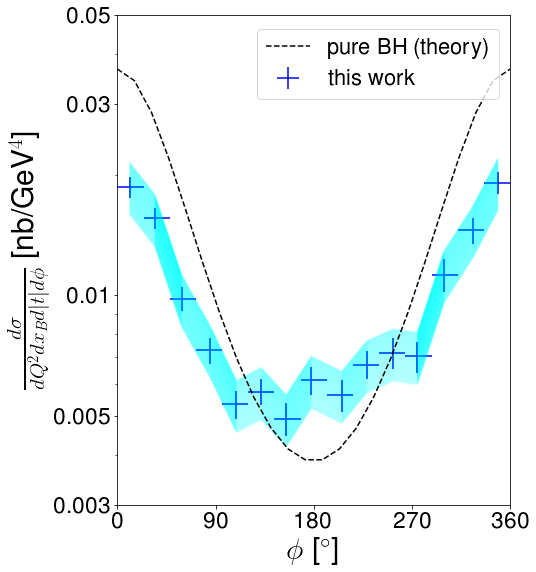

In [65]:
plt.rcParams["figure.figsize"] = (8, 8.5)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
# plt.errorbar(bincenters, xsecFD, yerr =uncxsecFD, linestyle = '')
# plt.errorbar(bincenters, xsecCD, yerr =uncxsecCD, linestyle = '')

for n in np.linspace(0.85, 1.15, 1001):
    plt.plot(phi2array332, n*xsec/Frad, color = 'cyan', alpha = 0.01)
plt.errorbar(phi2array332, xsec/Frad, xerr = np.array([np.array(phi2array332)-np.linspace(0,360-24,15), np.linspace(24,360,15)-np.array(phi2array332)]), yerr =uncxsec, linestyle = '', label = 'this work', color = 'b', zorder = 0)

# plt.plot(360/2/np.pi*np.array(phiarray), bharrayFD)
# plt.plot(360/2/np.pi*np.array(phiarray), bharrayCD)
plt.plot(360/2/np.pi*np.array(phiarray), bharrayall, color = 'k', label = "pure BH (theory)", linestyle = '--')
plt.legend(loc='right', bbox_to_anchor=[1, 0.9])
plt.yscale('log')
plt.yticks([0.003, 0.005, 0.01, 0.03, 0.05], [0.003, 0.005, 0.01, 0.03, 0.05])
plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.xlim([0, 360])
plt.xlabel(r"$\phi$" + " ["+degree+"]")
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.show()

In [48]:
phiarray = []
bharrayCD = []
bharrayFD = []
bharrayall = []
for i in np.linspace(0,2*np.pi, 24):
    phiarray.append(i)
    bharrayall.append(printBH(xBall, Q2all, t2all, i))
    bharrayFD.append(printBH(xBFD, Q2FD, t2FD, i))
    bharrayCD.append(printBH(xBCD, Q2CD, t2CD, i))

In [49]:
xBarray332, Q2array332, t2array332, phi2array332 = [], [], [], []
for i in range(15):
    phi_i = i*24
    phi_f = (i+1)*24
    cond_FD = (epgExpInbFD332.phi2<phi_f) & (epgExpInbFD332.phi2>phi_i)
    cond_CD = (epgExpInbCD332.phi2<phi_f) & (epgExpInbCD332.phi2>phi_i)
    xBall = ((sum(epgExpInbFD332.loc[cond_FD, "ds"]*epgExpInbFD332.loc[cond_FD, "xB"])+ sum(epgExpInbCD332.loc[cond_CD, "ds"]*epgExpInbCD332.loc[cond_CD, "xB"]))/(sum(epgExpInbFD332.loc[cond_FD, "ds"])+sum(epgExpInbCD332.loc[cond_CD, "ds"])))
    Q2all = ((sum(epgExpInbFD332.loc[cond_FD, "ds"]*epgExpInbFD332.loc[cond_FD, "Q2"])+ sum(epgExpInbCD332.loc[cond_CD, "ds"]*epgExpInbCD332.loc[cond_CD, "Q2"]))/(sum(epgExpInbFD332.loc[cond_FD, "ds"])+sum(epgExpInbCD332.loc[cond_CD, "ds"])))
    t2all =((sum(epgExpInbFD332.loc[cond_FD, "ds"]*epgExpInbFD332.loc[cond_FD, "t2"])+ sum(epgExpInbCD332.loc[cond_CD, "ds"]*epgExpInbCD332.loc[cond_CD, "t2"]))/(sum(epgExpInbFD332.loc[cond_FD, "ds"])+sum(epgExpInbCD332.loc[cond_CD, "ds"])))
    phi2all =((sum(epgExpInbFD332.loc[cond_FD, "ds"]*epgExpInbFD332.loc[cond_FD, "phi2"])+ sum(epgExpInbCD332.loc[cond_CD, "ds"]*epgExpInbCD332.loc[cond_CD, "phi2"]))/(sum(epgExpInbFD332.loc[cond_FD, "ds"])+sum(epgExpInbCD332.loc[cond_CD, "ds"])))
    xBarray332.append(xBall)
    Q2array332.append(Q2all)
    t2array332.append(t2all)
    phi2array332.append(phi2all)

In [287]:
for i in range(len(xBarray332)):
    print("./dvcsgen --beam 10.604 --x {0} {0} --q2 {1} {1} --t {2} {2} --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --radgen --printrad --phi {3}| grep averaged".format(xBarray332[i], Q2array332[i], t2array332[i], phi2array332[i]))

./dvcsgen --beam 10.604 --x 0.30267158115922244 0.30267158115922244 --q2 2.8884039618882693 2.8884039618882693 --t 0.2947727863656228 0.2947727863656228 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --radgen --printrad --phi 11.518449466501579| grep averaged
./dvcsgen --beam 10.604 --x 0.3019994635081028 0.3019994635081028 --q2 2.904575153545254 2.904575153545254 --t 0.2930891120156135 0.2930891120156135 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --radgen --printrad --phi 34.34209361220618| grep averaged
./dvcsgen --beam 10.604 --x 0.3087548642173112 0.3087548642173112 --q2 2.8715021389346367 2.8715021389346367 --t 0.2928651589134535 0.2928651589134535 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --radgen --printrad --phi 59.04084266893098| grep averaged
./dvcsgen --beam 10.604 --x 0.31086621049874785 0.31086621049874785 --q2 2.8790906634778257 2.8790906634778257 --t 0.2978896252882264 0.2978896252882264 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --radgen --printrad --phi 85.346049584683| grep 

In [50]:
Frad = np.array([0.92803787085316580, 0.90743498454817229, 0.90814605002390558, 0.90657697730593223, 0.91013265029248369, 0.92631305733213321, 0.91289614578351019, 0.91793581688069914, 0.91694685541467758, 0.90602601653981885, 0.91521648153588508, 0.91738924652821996, 0.91202157768247116, 0.92503615847115694, 0.90761419602604043])

In [51]:
xBall, Q2all, t2all

(0.29934845605849975, 2.90157604401991, 0.29571061704552426)